# 2013 統計数理

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from shiori.utils.viewer import set_plot_params
from shiori.utils.path import ProjectPath
import numpy as np
from pathlib import Path

In [8]:
set_plot_params()

In [9]:
name = Path().cwd().name + "/2013"
proj = ProjectPath(save_dst=name)
save_dir = proj.save_dir

# [1]

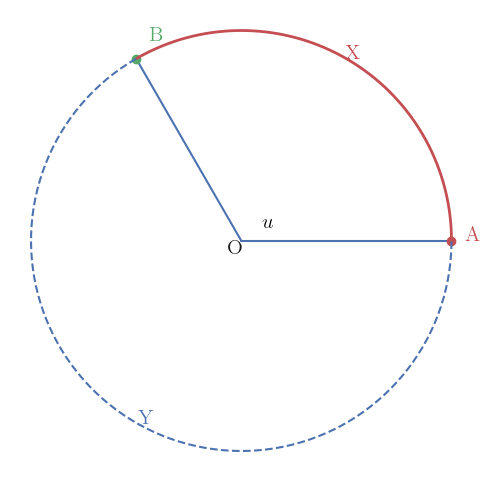

In [10]:
r = 1/(2*np.pi)
O = np.array([0,0])
A = np.array([r,0])
u = 2*np.pi/3
B = np.array([r*np.cos(u), r*np.sin(u)])

theta = np.linspace(0, 2*np.pi, 400)
circle_x = r*np.cos(theta)
circle_y = r*np.sin(theta)

# 弧AB: 短い方
arc_theta_short = np.linspace(0, u, 200) if u <= np.pi else np.linspace(u, 2*np.pi, 200)
arc_x_short = r*np.cos(arc_theta_short)
arc_y_short = r*np.sin(arc_theta_short)

# 弧AB: 長い方
arc_theta_long = np.linspace(u, 2*np.pi, 200) if u <= np.pi else np.linspace(0, u, 200)
arc_x_long = r*np.cos(arc_theta_long)
arc_y_long = r*np.sin(arc_theta_long)

plt.figure(figsize=(5,5))
# plt.plot(circle_x, circle_y, 'k--', alpha=0.5)   # 円
plt.plot([O[0],A[0]], [O[1],A[1]], 'b-')         # OA
plt.plot([O[0],B[0]], [O[1],B[1]], 'b-')         # OB
plt.plot(A[0], A[1], 'ro')  # A
plt.plot(B[0], B[1], 'go')  # B

# ラベル
plt.text(A[0]+0.01, A[1], "A", color="r", fontsize=15)
plt.text(B[0]+0.01, B[1]*1.1, "B", color="g", fontsize=15)
plt.text(O[0]-0.01, O[1]-0.01, "O", color="k", fontsize=15)

# 弧にラベル
mid_short = (arc_x_short[len(arc_x_short)//2], arc_y_short[len(arc_y_short)//2])
plt.text(mid_short[0], mid_short[1], "X", color="r", fontsize=15)

mid_long = (arc_x_long[len(arc_x_long)//2], arc_y_long[len(arc_y_long)//2])
plt.text(mid_long[0], mid_long[1], "Y", color="b", fontsize=15)

# 角度uの表示
plt.text(0.1*A[0], 0.01, r"$u$", fontsize=15)

plt.plot(arc_x_short, arc_y_short, 'r', linewidth=2)
plt.plot(arc_x_long, arc_y_long, 'b', linestyle="--")

plt.gca().set_aspect("equal")
plt.axis(False)
plt.tight_layout()
# plt.savefig(save_dir.joinpath("circle.png"), dpi=300, facecolor="white")
plt.show()

# [2]

In [11]:
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})

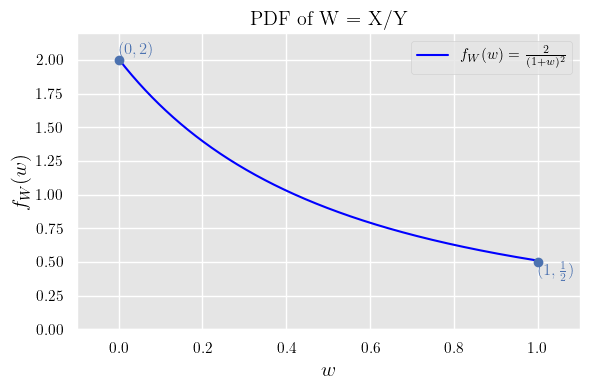

In [12]:
# w の範囲
eps = 1e-6
w = np.linspace(0+eps, 1-eps, 500)

# 確率密度関数
f_w = np.where((w > 0) & (w < 1), 2/(1+w)**2, 0)

# plot
plt.figure(figsize=(6,4))
plt.plot(w, f_w+0.01, label=r"$f_W(w)=\frac{2}{(1+w)^2}$", color="blue")

#(0,2), (1, 0.5)の点を打つ
plt.plot([0, 1], [2, 0.5], 'bo')
plt.text(0, 2+0.05, r"$(0,2)$", fontsize=12, color="b")
plt.text(1, 0.5-0.1, r"$(1,\frac{1}{2})$", fontsize=12, color="b")
# plt.fill_between(w, f_w, alpha=0.2, color="blue")

plt.title("PDF of W = X/Y")
plt.xlabel(r"$w$", fontsize=15)
plt.ylabel(r"$f_W(w)$", fontsize=15)
plt.ylim(0, 2.2)
plt.xlim(0-0.1, 1+0.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(save_dir.joinpath("w_pdf.png"), dpi=300, facecolor="white")
plt.show()


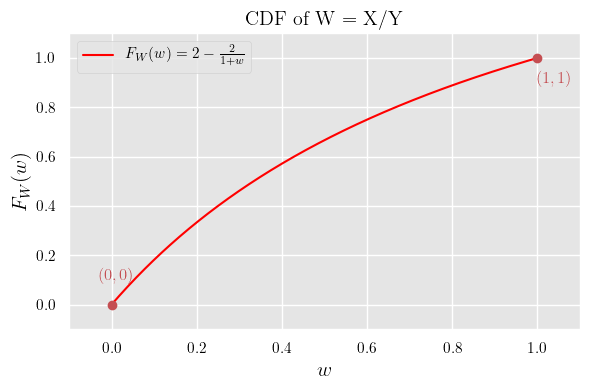

In [13]:
# w の範囲
eps = 1e-6
w = np.linspace(0+eps, 1-eps, 500)

# CDF
F_w = 2 - 2/(1+w)

# plot
plt.figure(figsize=(6,4))
plt.plot(w, F_w, label=r"$F_W(w)=2-\frac{2}{1+w}$", color="red")

# (0,0), (1,1) の点を打つ
plt.plot([0, 1], [0, 1], 'ro')
plt.text(-0.03, 0+0.1, r"$(0,0)$", fontsize=12, color="r")
plt.text(1, 1-0.1, r"$(1,1)$", fontsize=12, color="r")

plt.title("CDF of W = X/Y")
plt.xlabel(r"$w$", fontsize=15)
plt.ylabel(r"$F_W(w)$", fontsize=15)
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(save_dir.joinpath("w_cdf.png"), dpi=300, facecolor="white")
plt.show()
